In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

In [ ]:
file_name = "/content/drive/My Drive/Colab Notebooks/PLANT DISEASE/archive.zip"
  
# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file  
  
    # extracting all the files 
    zip.extractall() 
    print('Done!') 

Done!


In [ ]:
import os

In [ ]:
os.listdir("../input/plant-diseases-classification-using-alexnet")

**Building CNN Based On AlexNet Architecture**

In [ ]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [ ]:
# Initializing the CNN
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 38, activation = 'softmax'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

**Loading Weights To The Model**

In [ ]:
classifier.load_weights('/content/drive/My Drive/Colab Notebooks/PLANT DISEASE/best_weights_9.hdf5')

**Fine Tuning By Freezing Some Layers Of Our Model**

In [ ]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:
from keras import layers
for i, layer in enumerate(classifier.layers):
   print(i, layer.name)

0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten
14 dense
15 dropout
16 batch_normalization_5
17 dense_1
18 dropout_1
19 batch_normalization_6
20 dense_2
21 dropout_2
22 batch_normalization_7
23 dense_3


In [ ]:
# we chose to train the top 2 conv blocks, i.e. we will freeze
# the first 8 layers and unfreeze the rest:
print("Freezed layers:")
for i, layer in enumerate(classifier.layers[:20]):
    print(i, layer.name)
    layer.trainable = False

Freezed layers:
0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 batch_normalization_2
8 conv2d_3
9 batch_normalization_3
10 conv2d_4
11 max_pooling2d_2
12 batch_normalization_4
13 flatten
14 dense
15 dropout
16 batch_normalization_5
17 dense_1
18 dropout_1
19 batch_normalization_6


**Model Summary After Freezing**

In [ ]:
#trainable parameters decrease after freezing some bottom layers   
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

**Compiling the Model**

In [ ]:
# Compiling the Model
from keras import optimizers
classifier.compile(optimizer=optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Image Preprocessing**

In [ ]:
# image preprocessing
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128

In [ ]:
base_dir = ""

training_set = train_datagen.flow_from_directory('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                             class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [ ]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples

In [ ]:
# checkpoint
from keras.callbacks import ModelCheckpoint
weightpath = "/content/drive/My Drive/Colab Notebooks/PLANT DISEASE/best_weights_9.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
#fitting images to CNN
history = classifier.fit_generator(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=11,
                         validation_steps=valid_num//batch_size,
                         callbacks=callbacks_list)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/11
549/549 [==============================] - 770s 1s/step - loss: 0.0999 - accuracy: 0.9665 - val_loss: 0.0733 - val_accuracy: 0.9749
Epoch 2/11
549/549 [==============================] - 764s 1s/step - loss: 0.0943 - accuracy: 0.9687 - val_loss: 0.0721 - val_accuracy: 0.9753
Epoch 3/11
549/549 [==============================] - 773s 1s/step - loss: 0.0905 - accuracy: 0.9705 - val_loss: 0.0709 - val_accuracy: 0.9754
Epoch 4/11
549/549 [==============================] - 775s 1s/step - loss: 0.0937 - accuracy: 0.9691 - val_loss: 0.0704 - val_accuracy: 0.9757
Epoch 5/11
549/549 [==============================] - 820s 1s/step - loss: 0.0910 - accuracy: 0.9707 - val_loss: 0.0702 - val_accuracy: 0.9760
Epoch 6/11
549/549 [==============================] - 812s 1s/step - loss: 0.0917 - accuracy: 0.9704 - val_loss: 0.0695 - val_accuracy: 0.9763
Epoch 7/11
549/549 [==============================] - 816s 1s/step

In [ ]:
#saving model
filepath="/content/drive/My Drive/Colab Notebooks/PLANT DISEASE/model.hdf5"
classifier.save(filepath)

In [ ]:
import pickle

In [ ]:
filename = '/content/drive/My Drive/Colab Notebooks/PLANT DISEASE/plant_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

TypeError: ignored

**Visualising Training Progress**

In [ ]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

KeyError: ignored

**Predicting New Test Image(s)**

In [ ]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/test/test/AppleScab1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

In [ ]:
print("Following is our prediction:")
prediction = classifier.predict(img)

Following is our prediction:


In [ ]:
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

In [ ]:
##Another way
# img_class = classifier.predict_classes(img)
# img_prob = classifier.predict_proba(img)
# print(img_class ,img_prob )

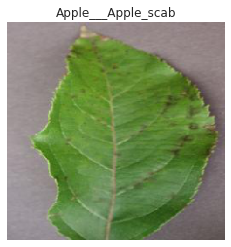

In [ ]:
#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

# RUF TRY

In [2]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/PLANT DISEASE/model.hdf5')

In [3]:
print(model)

In [120]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = "/content/0162027.jpg"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

In [121]:
prediction = model.predict(img)

In [122]:
print(prediction)

[[1.10219503e-07 1.03491982e-09 2.39763864e-07 5.99216099e-09
  1.67710990e-09 2.46288046e-10 2.04481427e-08 1.51032418e-05
  4.70387167e-05 3.84412658e-07 3.20266935e-07 1.11025400e-07
  2.24638919e-04 4.57258375e-06 3.24843624e-10 1.01149666e-07
  9.85443354e-01 1.64403264e-08 1.32394973e-06 1.68490433e-09
  1.53387919e-06 1.23225086e-09 1.68064174e-09 2.86112112e-09
  3.50841300e-10 2.18013376e-08 7.67031025e-08 2.79582424e-09
  1.32788122e-02 9.67705040e-04 5.98009092e-06 3.04265740e-07
  9.99071830e-08 7.58393459e-10 3.33595290e-10 8.04465890e-06
  1.34082711e-07 1.77084800e-08]]


In [123]:
# image preprocessing
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128

In [124]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/PLANT DISEASE/New Plant Diseases /train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

Found 70399 images belonging to 38 classes.


In [125]:
class_dict = training_set.class_indices
print(class_dict)
li = list(class_dict.keys())
print(li)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [126]:
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

In [127]:
class_name

'Peach___Bacterial_spot'

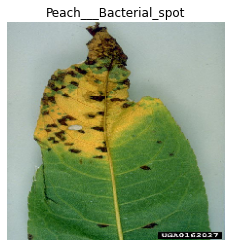

In [128]:
#ploting image with predicted class name 
import matplotlib.pyplot as plt       
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()